In [2]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)

In [4]:
# print the first five records

print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [5]:
# rename the columns
column_name = {"X1" : "Relative_Compactness", 
               "X2" : "Surface_Area",
              "X3" : "Wall_Area",
              "X4" : "Roof_Area",
              "X5" : "Overall_Heights",
              "X6" : "Orientation",
              "X7" : "Glazing_Area",
              "X8" : "Glazing_Area_Distribution",
              "Y1" : "Heating_Load",
              "Y2" : "Cooling_Load"}

df = df.rename(columns=column_name)

In [6]:
# Display the the first five records

df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Heights,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
# Take a smaple from the dataset
simple_reg_df = df[["Relative_Compactness", "Cooling_Load"]].sample(15, random_state=2)

In [8]:
# Check the information contained in the sampled data
simple_reg_df

,Relative_Compactness,Cooling_Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59
573,0.62,17.21
553,0.74,17.25
728,0.86,29.69
183,0.66,13.83
515,0.69,14.60


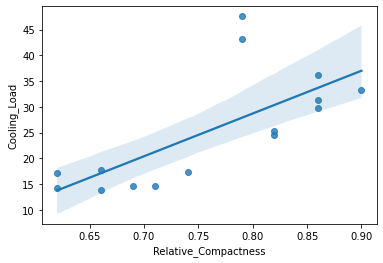

In [9]:
# Plot a regression line for the sampled dataset
sns.regplot(x="Relative_Compactness", y = "Cooling_Load", data = simple_reg_df)

plt.show()

In [10]:
# checking whether there is presence of multicolinearity among the features i.e problem of multicolinearity

X = df[["Relative_Compactness", "Surface_Area"]]

y = df["Cooling_Load"]

In [11]:
import statsmodels.api as sm

X = sm.add_constant(X)

C:\Users\KAYODE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
X.head()

,const,Relative_Compactness,Surface_Area
0,1.0,0.98,514.5
1,1.0,0.98,514.5
2,1.0,0.98,514.5
3,1.0,0.98,514.5
4,1.0,0.90,563.5


In [13]:
# fit the OLS model

model = sm.OLS(y, X).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Cooling_Load   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     416.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.23e-123
Time:                        14:17:12   Log-Likelihood:                -2536.4
No. Observations:                 768   AIC:                             5079.
Df Residuals:                     765   BIC:                             5093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  363.0331     27.769     13.073      0.000     308.521     417.545
Relative_Compactness  -185.1513     17.713    -10.453      0.000    -219.924    -150.379
Surface_Area            -0.2932      0.021    -13.785      0.000      -0.335      -0.251
==============================================================================
Omnibus:                       28.080   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.547
Skew:                           0.202   Prob(JB):                     0.000255
Kurtosis:                       2.406   Cond. No.                     9.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
df.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Heights,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
Overall_Heights,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
Glazing_Area,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
Glazing_Area_Distribution,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Heating_Load,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Cooling_Load,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


# Using Sk-Learn library to examine the relationship between Relative_compactness and Cooling_Load

In [1]:
from sklearn.linear_model import LinearRegression

In [16]:
# instantiate object for the model

model = LinearRegression()

In [17]:
# define X and y

x = df[["Relative_Compactness"]]
y = df["Cooling_Load"]

In [21]:
# Split the dataset into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =1)

In [22]:
# fit the model

model.fit(X_train, y_train)

LinearRegression()

In [23]:
# print the coefficient of the model

model.coef_

array([56.1486788])

###### Based on the magnitude of the coefficient, we would expect a positive relationship between relative compactness (X) and cooling load (y). This means that as relative compactness increases, cooling load increase as well.
###### Finally it is important to note that when relative compactness changes by relatively small unit ( say 1 unit), cooling load would change by 56 units.

In [24]:
# print the intercept of the model

model.intercept_

-18.681309187313396

In [25]:
# Generate prediction from the model

model_pred = model.predict(X_test)

In [27]:
# Evaluate the performance of the model using Mean Squared Error (MSE)

from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, model_pred)

MSE

56.8317046442471